In [1]:
#Exploring text data
#About the dataset
#Generating word frequency
#EDA using word clouds
#Text cleaning

In [2]:
import pandas as pd
#Load the dataset
df=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
df.head(5)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


In [3]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [4]:
combined_tweets=' '.join(df.text.values)

In [5]:
combined_tweets

'RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It\'s clearly fishy and requires full disclosure &amp;Â\x85 RT @Hemant_80: Did you vote on #Demonetization on Modi survey app? RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to thÂ\x85 RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9Â\x85 RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F @DerekScissors1: IndiaÂ\x92s #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such incident since #demonetization. That\'s how terrorists haveÂ\x85 RT @Joydeep_911: Calling all Nationalists to join...\r\nWalk for #CorruptionFreeIndia and spread the be

In [6]:
doc=nlp(combined_tweets)

In [7]:
# function for generating word frequency
def gen_freq(tokens):
  word_freq=pd.Series([token.text for token in tokens]).value_counts()
  print(word_freq[:20])
  return word_freq

In [8]:
word_freq=gen_freq(doc)

#                 4767
demonetization    1642
.                 1593
:                 1523
Demonetization    1426
to                1151
the               1140
,                 1139
                 1109
of                1069
RT                1047
\r\n               990
in                 912
on                 724
is                 687
a                  525
's                 473
-                  468
?                  459
and                446
Name: count, dtype: int64


In [9]:
#EDA using word clouds
!pip install wordcloud

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
#function for generating word cloud
def generate_wordcloud(data):
  cleaned_data = {k.replace('\n', ' '): v for k, v in data.items()}
  wc=WordCloud(width=400,height=330,max_words=200,background_color='white').generate_from_frequencies(cleaned_data)
  plt.figure(figsize=(14,12))
  plt.imshow(wc,interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [12]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 12332


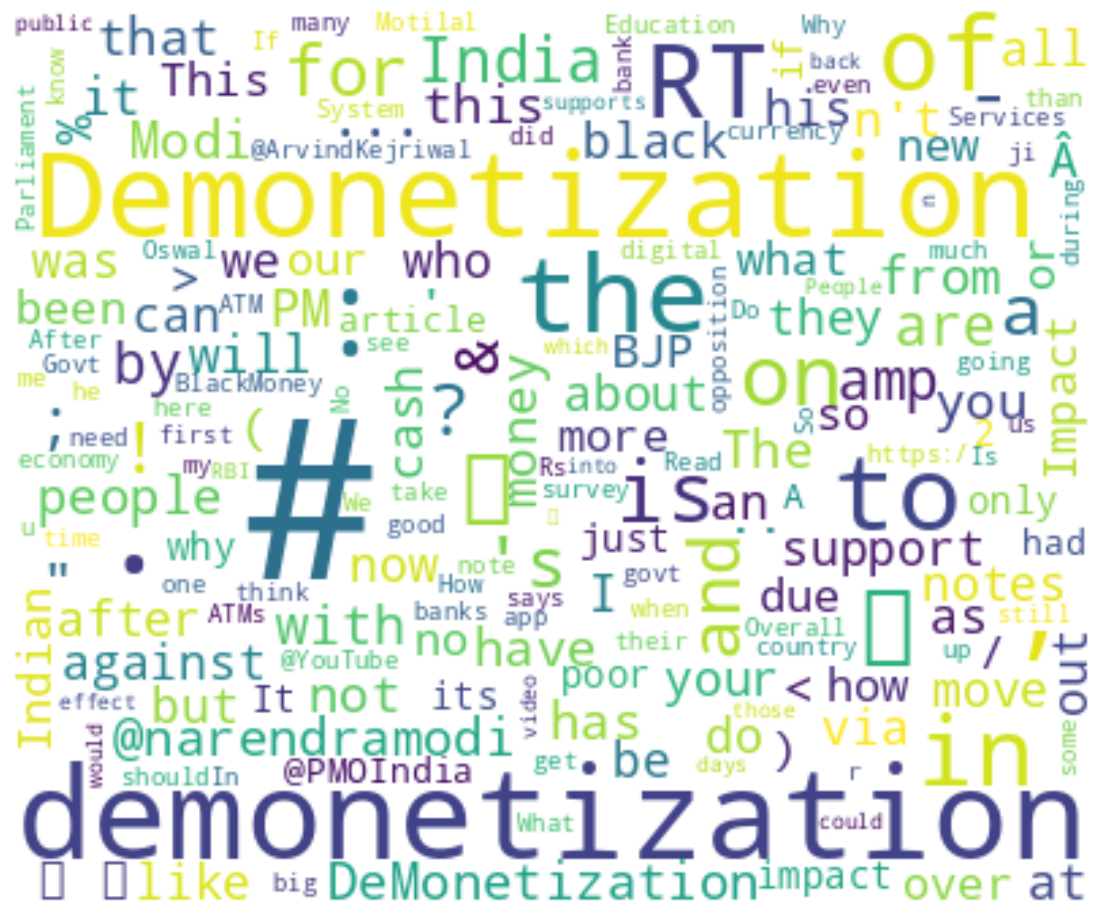

In [13]:
generate_wordcloud(word_freq)

In [14]:
import re

In [15]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [17]:
#Lowercasing the text
combined_tweets=combined_tweets.lower()

In [18]:
doc=nlp(combined_tweets)

In [28]:
#removing stop words and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [29]:
#Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    3288
                  1165
\r\n               988
                  865
india              370
amp                307
modi               294
\r\n\r\n           256
people             247
>                  245
                  244
<                  243
@narendramodi      233
money              214
pm                 207
cash               155
impact             146
support            129
black              115
govt               110
Name: count, dtype: int64


In [30]:
print(len(word_freq))

10647


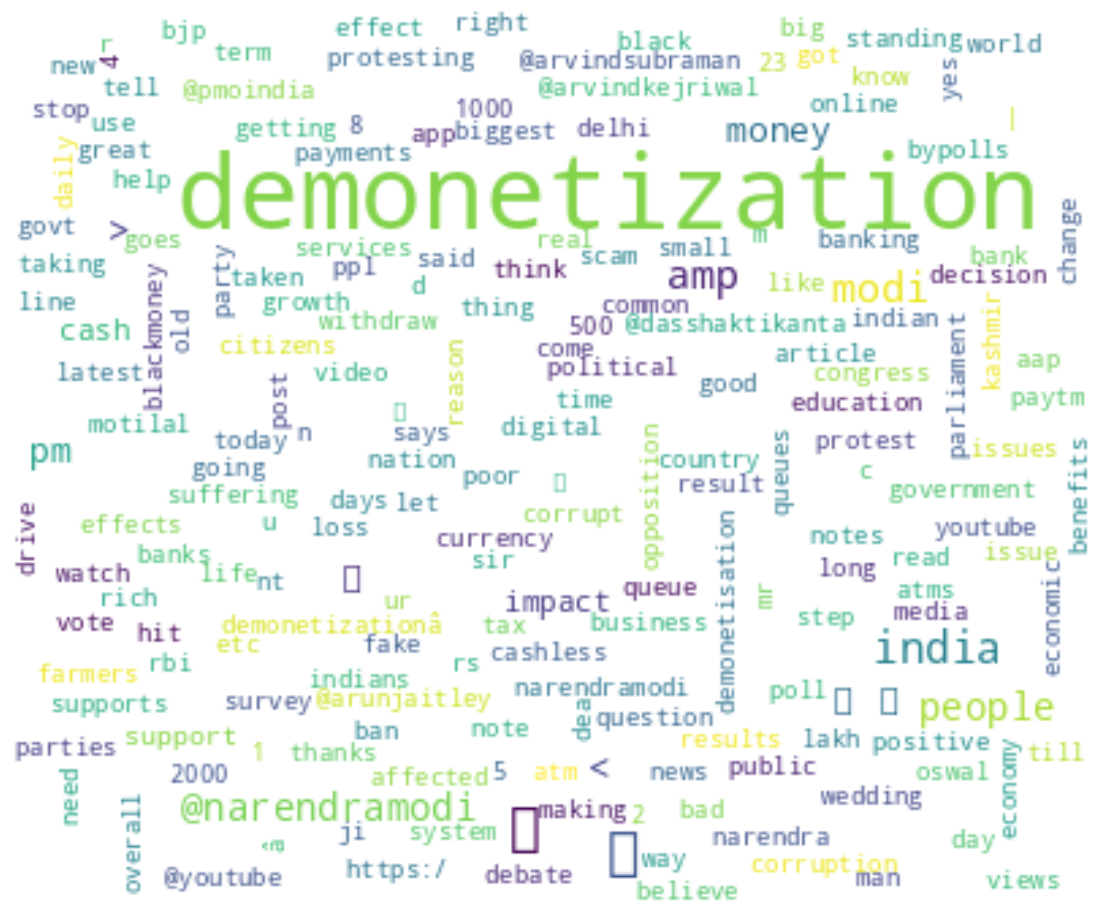

In [31]:
generate_wordcloud(word_freq)

In [26]:
#text cleaning p2

In [32]:
combined_tweets=' '.join([token.text for token in tokens])

In [34]:
#Removing  "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [35]:
# creating doc object
doc=nlp(combined_tweets)

In [36]:
#Removing whitespaces
tokens=[token for token in doc if token.is_space==False]

In [37]:
word_freq=gen_freq(tokens)

demonetization    3292
india              370
modi               294
people             247
@narendramodi      233
money              215
pm                 208
cash               155
impact             146
support            129
black              115
govt               110
new                104
notes              101
like                98
banks               90
opposition          85
bank                81
bjp                 81
u                   79
Name: count, dtype: int64


In [38]:
len(word_freq)

10620

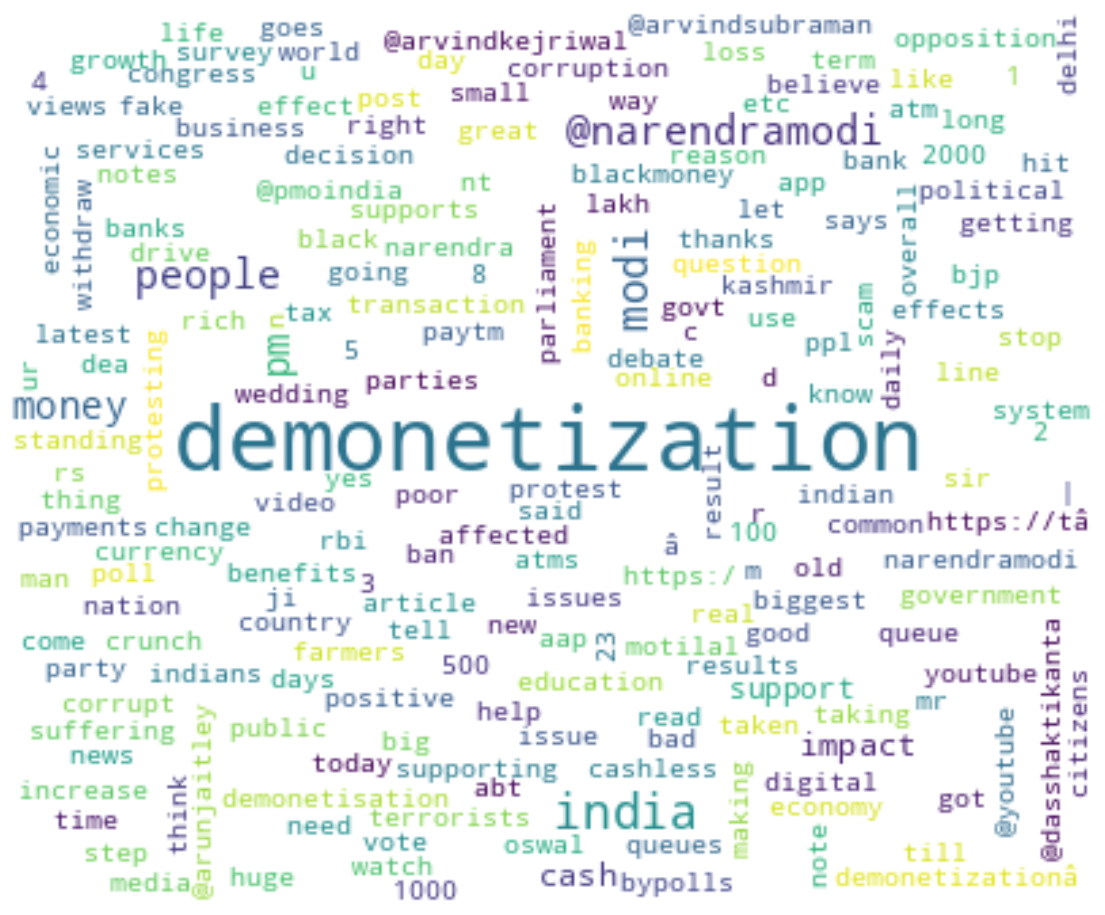

In [40]:
generate_wordcloud(word_freq)